<a href="https://colab.research.google.com/github/sophiasagan/DSI_Repo/blob/main/Classification_Tree_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Tree

In [27]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


In [28]:
from google.colab import drive
drive.mount('/content/drive')
%cd /drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/drive'
/content/drive/MyDrive/Colab Notebooks/DSI


In [29]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Colab Notebooks/DSI


In [30]:
%cd MyDrive/'Colab Notebooks'

[Errno 2] No such file or directory: 'MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/DSI


In [31]:
%cd DSI

[Errno 2] No such file or directory: 'DSI'
/content/drive/MyDrive/Colab Notebooks/DSI


In [32]:
data_for_model = pickle.load(open("data/abc_classification_modelling.p", "rb"))

In [33]:
data_for_model.drop("customer_id", axis = 1, inplace = True)
# shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)
data_for_model.head()

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [8]:
# class balance
data_for_model['signup_flag'].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [34]:
# deal with missing values
data_for_model.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [36]:
# split input variables & output variable
X = data_for_model.drop(["signup_flag"], axis = 1)
y = data_for_model["signup_flag"]

In [37]:
# split out training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [38]:
# deal with categorical variables
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = 'first')

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_encoded.reset_index(drop = True)], axis = 1)
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), X_test_encoded.reset_index(drop = True)], axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
X_train

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.22,0.60,636.51,123,22,5,28.932273,0.0
1,0.86,0.56,1141.28,112,21,5,54.346667,1.0
2,1.23,0.79,1207.42,210,26,4,46.439231,1.0
3,1.04,0.40,78.18,11,3,2,26.060000,1.0
4,0.07,0.62,740.51,94,24,5,30.854583,1.0
...,...,...,...,...,...,...,...,...
672,0.95,0.45,714.06,135,29,5,24.622759,0.0
673,3.85,0.58,1357.93,210,20,3,67.896500,0.0
674,1.51,0.67,958.23,160,26,5,36.855000,1.0
675,4.49,0.43,1531.61,135,24,5,63.817083,0.0


In [40]:
X_test


,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.92,0.64,1283.76,191,30,5,42.792000,0.0
1,5.38,0.64,5180.71,662,56,5,92.512679,0.0
2,3.18,0.67,2482.50,288,30,5,82.750000,0.0
3,1.59,0.50,319.37,85,17,5,18.786471,1.0
4,2.73,0.36,1146.93,211,24,3,47.788750,0.0
...,...,...,...,...,...,...,...,...
165,0.83,0.49,190.27,50,6,4,31.711667,1.0
166,1.08,0.69,623.07,81,21,5,29.670000,1.0
167,0.50,0.56,523.25,117,27,4,19.379630,0.0
168,0.65,0.47,350.26,93,26,4,13.471538,0.0


In [42]:
# model training
clf = DecisionTreeClassifier(random_state = 42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [43]:
y_pred_class = clf.predict(X_test)
y_pred_class

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [44]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.92857143, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.78571429, 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.05882353, 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.78571429,
       0.        , 1.        , 1.        , 0.        , 0.05882353,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.78571429,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.78571429, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
conf_matrix

array([[112,   6],
       [  6,  46]])

<ipython-input-46-a0a704f6dc19>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


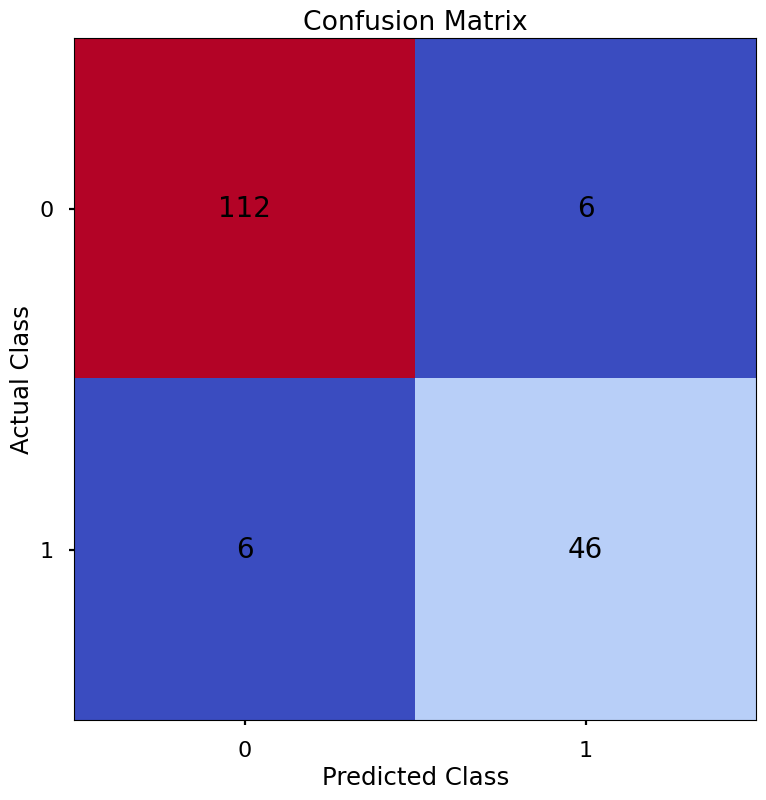

In [46]:
import numpy as np

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha ="center", va="center",fontsize=20)
plt.show()

In [47]:
# Accuracy (the number of correct classification out of all attempted classifications)
accuracy_score(y_test, y_pred_class)

0.9294117647058824

In [48]:
# Precision (of all observations that were predicted as positive, how many were actually positive)
precision_score(y_test, y_pred_class)

0.8846153846153846

In [49]:
# Recall (of all positive observations, how many did we predict as positive)
recall_score(y_test, y_pred_class)

0.8846153846153846

In [50]:
# F1-score (the harmonic mean of precision and recall)
f1_score(y_test, y_pred_class)

0.8846153846153846

In [51]:
# Finding the best max_depth
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:

    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]


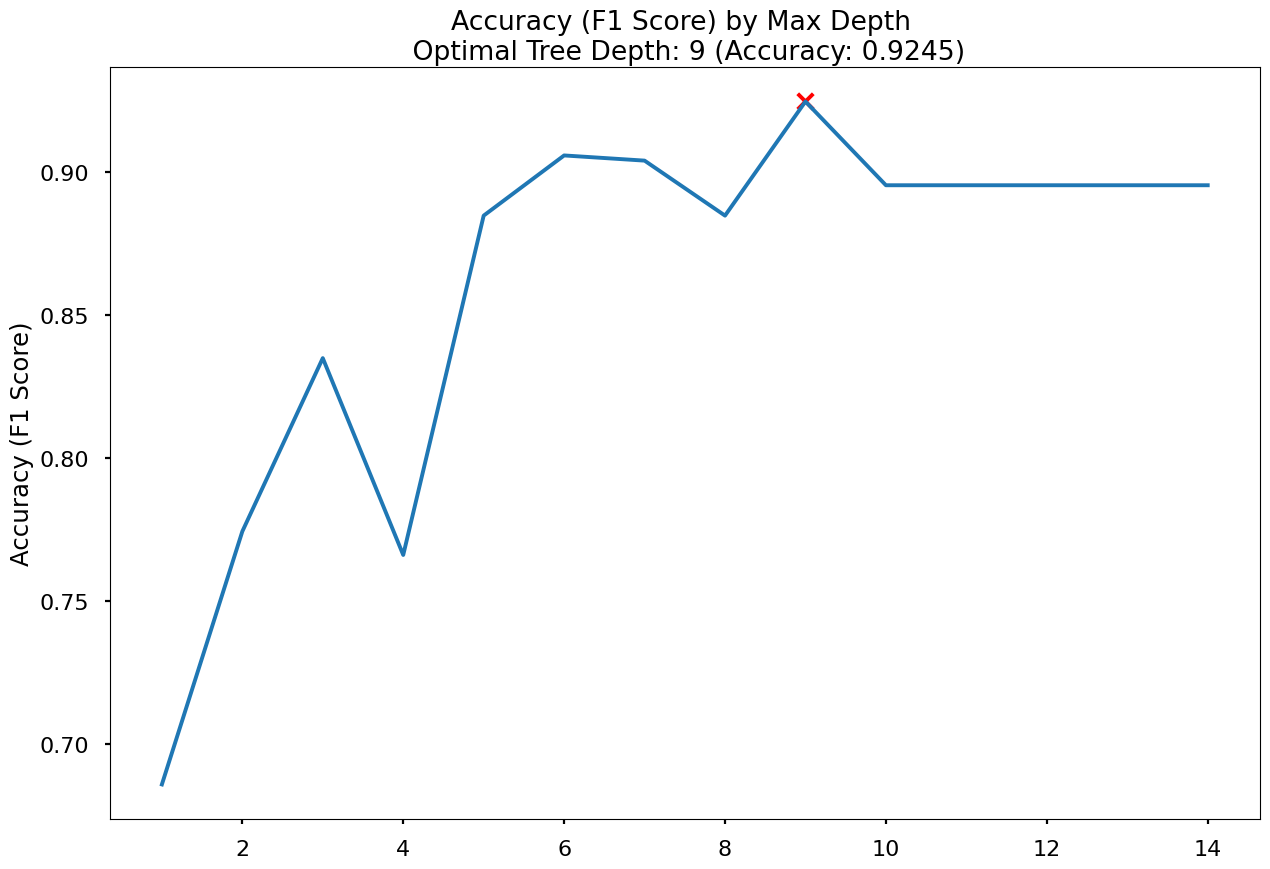

In [52]:
# plot of max depths
plt.plot(max_depth_list, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = "x", color = "red")
plt.title(f"Accuracy (F1 Score) by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy: {round(max_accuracy, 4)})")
plt.ylabel("Accuracy (F1 Score)")
plt.tight_layout()
plt.show()

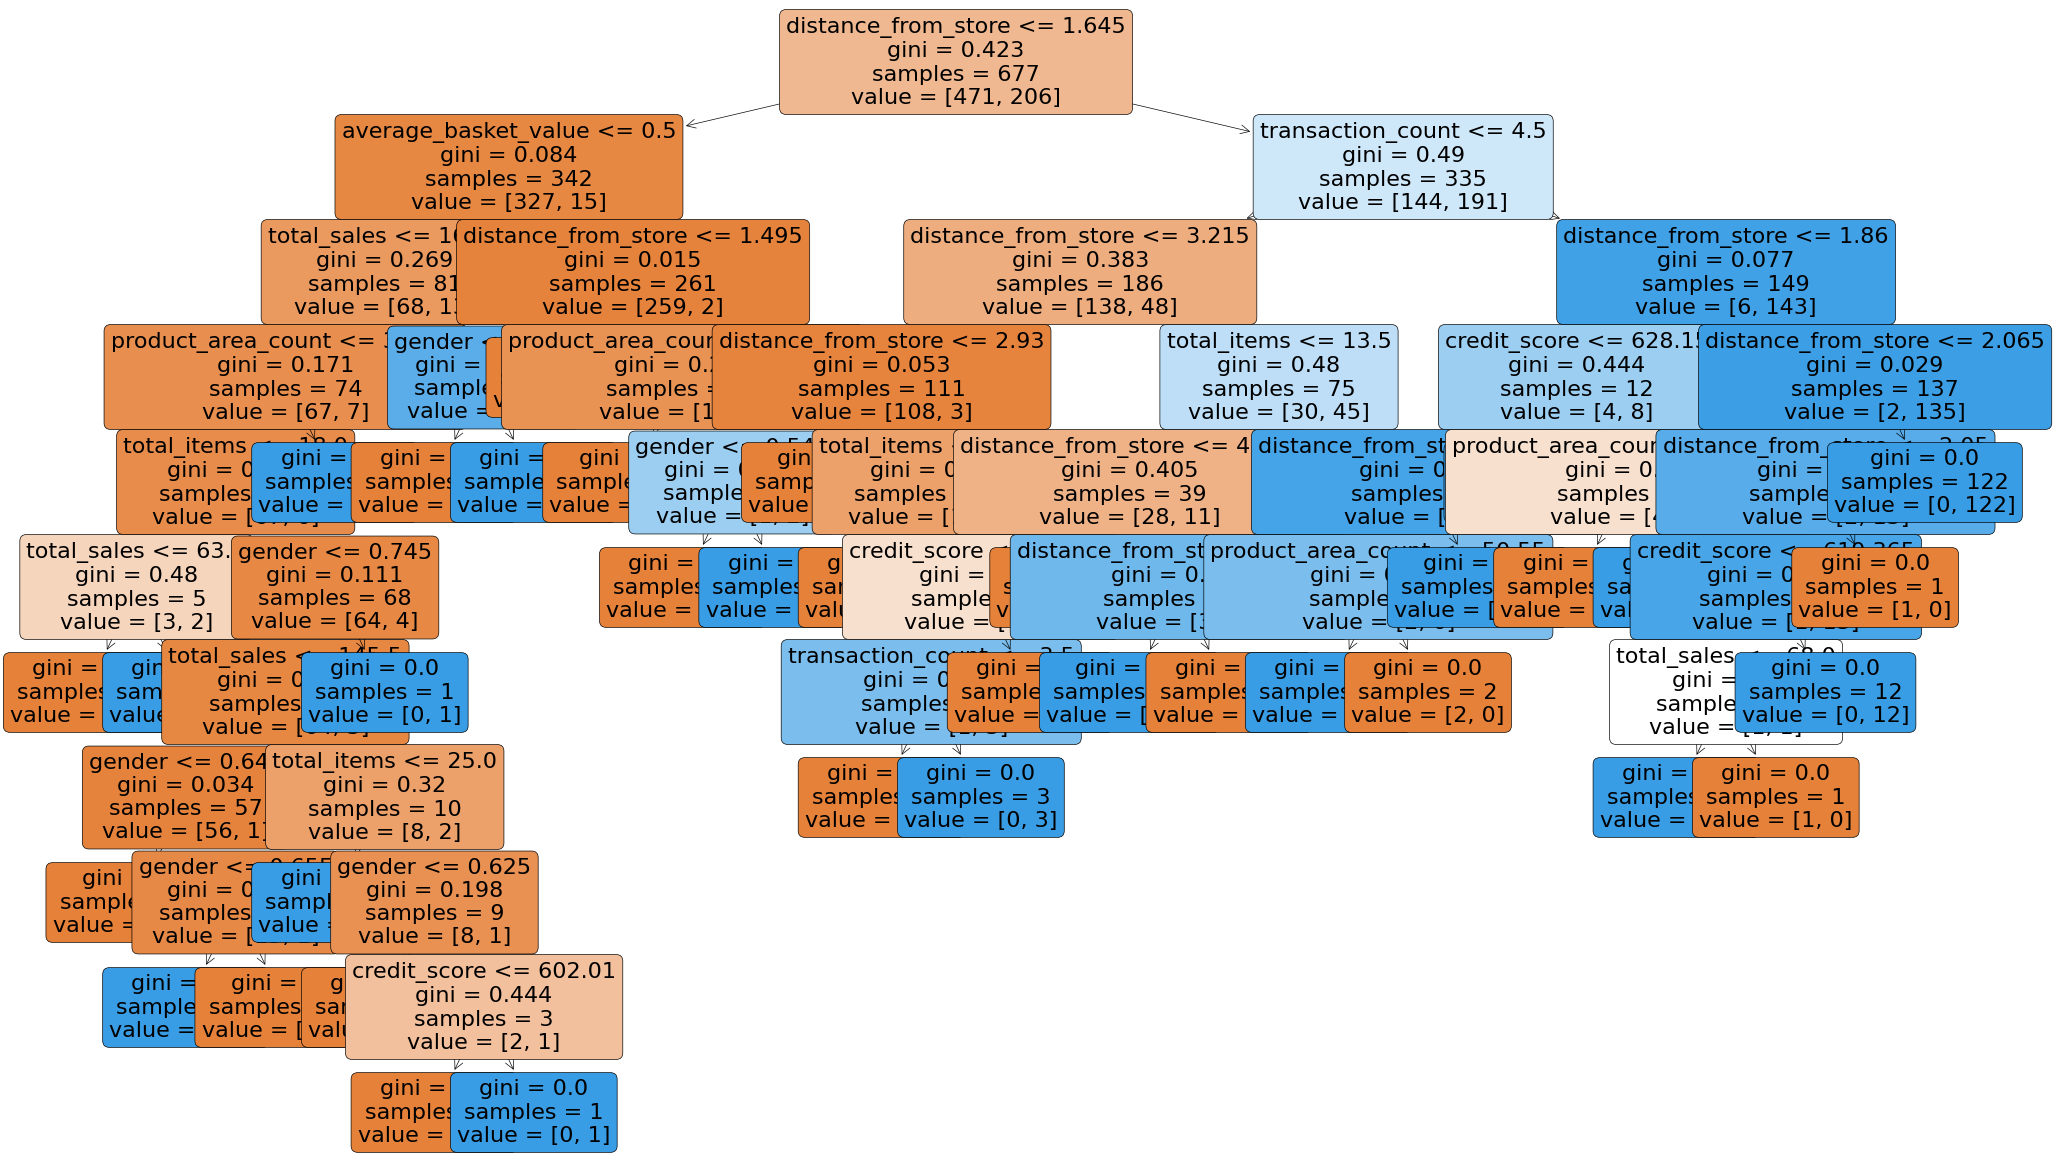

In [54]:
# plot our model
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                feature_names = X.columns,
                filled = True,
                rounded = True,
                fontsize = 16)

Finding Optimal Threshold


In [ ]:
thresholds = np.arange(0,1,0.01)
thresholds

In [ ]:
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:

    pred_class = (y_pred_prob >= threshold) * 1

    precision = precision_score(y_test, pred_class, zero_division = 0)
    precision_scores.append(precision)

    recall = recall_score(y_test, pred_class)
    recall_scores.append(recall)

    f1 = f1_score(y_test, pred_class)
    f1_scores.append(f1)
max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)
plt.style.use('seaborn-poster')
plt.plot(thresholds, precision_scores, label = "Precision", linestyle = "--")
plt.plot(thresholds, recall_scores, label = "Recall", linestyle = "--")
plt.plot(thresholds, f1_scores, label = "f1", linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)}(Threshold = {round(thresholds[max_f1_idx],2)})")
plt.xlabel("Threshold")
plt.ylabel("Assessment Score")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [ ]:
optimal_threshold = 0.44
y_pred_class_opt_thresh = (y_pred_prob >= optimal_threshold) * 1
y_pred_class_opt_thresh